In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json
from scipy.stats import linregress

In [2]:
#UNEMPLOYMENT
#Read annual working hours per worker on the world
WH_data = pd.read_csv('data/annual-working-hours-per-worker.csv')
WH_data.head()

,Entity,Code,Year,Average annual working hours per worker
0,Argentina,ARG,1950,2034.0000
1,Argentina,ARG,1951,2037.8667
2,Argentina,ARG,1952,2041.7408
3,Argentina,ARG,1953,2045.6223
4,Argentina,ARG,1954,2049.5112


In [3]:
#Filter only for USA
filt=(WH_data["Code"]=='USA')
WH_USA_df=WH_data[filt]
WH_USA_df.head()

,Entity,Code,Year,Average annual working hours per worker
3263,United States,USA,1870,3096.0
3264,United States,USA,1880,3044.0
3265,United States,USA,1890,2983.0
3266,United States,USA,1900,2938.0
3267,United States,USA,1913,2900.0


In [4]:
#Checking Datatypes
WH_USA_df.dtypes

Entity                                      object
Code                                        object
Year                                         int64
Average annual working hours per worker    float64
dtype: object

In [5]:
#Building url to fetch data from the OECD website for USA umeployment rate and printing response
OECD_url='https://stats.oecd.org/SDMX-JSON/data/KEI/LR+LRHUTTTT.USA.ST.A/all?startTime=1914&endTime=2020&dimensionAtObservation=allDimensions'
response = requests.get(OECD_url).json()
print(response)

{'header': {'id': '284f258b-b54c-48f3-bd50-5dafce2f97ba', 'test': False, 'prepared': '2021-01-14T10:06:45.2519652Z', 'sender': {'id': 'OECD', 'name': 'Organisation for Economic Co-operation and Development'}, 'links': [{'href': 'https://stats.oecd.org:443/SDMX-JSON/data/KEI/LR+LRHUTTTT.USA.ST.A/all?startTime=1914&endTime=2020&dimensionAtObservation=allDimensions', 'rel': 'request'}]}, 'dataSets': [{'action': 'Information', 'observations': {'0:0:0:0:0': [4.38333333333333, 0, None, 0, 0, None], '0:0:0:0:1': [4.14166666666667, 0, None, 0, 0, None], '0:0:0:0:2': [4.25833333333333, 0, None, 0, 0, None], '0:0:0:0:3': [6.8, 0, None, 0, 0, None], '0:0:0:0:4': [5.475, 0, None, 0, 0, None], '0:0:0:0:5': [5.50833333333333, 0, None, 0, 0, None], '0:0:0:0:6': [6.68333333333333, 0, None, 0, 0, None], '0:0:0:0:7': [5.54166666666666, 0, None, 0, 0, None], '0:0:0:0:8': [5.66666666666667, 0, None, 0, 0, None], '0:0:0:0:9': [5.19166666666667, 0, None, 0, 0, None], '0:0:0:0:10': [4.525, 0, None, 0, 0, Non

In [8]:
#Extracting Year, and unemployment rate from response
Unemp_Rate=[]
Year=[]
Country=[]

for value in range(0,Total_val):
    Unemp_Rate.append(response['dataSets'][0]['observations']["0:0:0:0:"+str(value)][0])
    Country.append("USA")
    Year.append(response['structure']['dimensions']['observation'][4]['values'][value]['id'])


In [9]:
#Building Data Frame
data={'Country':Country, 'Year':Year, 'Unemployment Rate': Unemp_Rate}
Unemp_Rate_df=pd.DataFrame(data)
Unemp_Rate_df.head()

,Country,Year,Unemployment Rate
0,USA,1955,4.383333
1,USA,1956,4.141667
2,USA,1957,4.258333
3,USA,1958,6.800000
4,USA,1959,5.475000


In [10]:
#Checking Datatypes
Unemp_Rate_df.dtypes

Country               object
Year                  object
Unemployment Rate    float64
dtype: object

In [11]:
#Changing Data type
Unemp_Rate_df["Year"] = Unemp_Rate_df["Year"].astype(np.int64)
Unemp_Rate_df.dtypes

Country               object
Year                   int64
Unemployment Rate    float64
dtype: object

In [12]:
#Merging Data frames
data_combined_df=pd.merge(WH_USA_df, Unemp_Rate_df, how="outer", on="Year")
data_combined_df.dropna(inplace=True)
data_combined_df

,Entity,Code,Year,Average annual working hours per worker,Country,Unemployment Rate
12,United States,USA,1955,2004.5018,USA,4.383333
13,United States,USA,1956,1989.3650,USA,4.141667
14,United States,USA,1957,1961.5238,USA,4.258333
15,United States,USA,1958,1927.5476,USA,6.800000
16,United States,USA,1959,1952.8529,USA,5.475000
...,...,...,...,...,...,...
70,United States,USA,2013,1750.0786,USA,7.375000
71,United States,USA,2014,1754.4224,USA,6.166667
72,United States,USA,2015,1765.1826,USA,5.291667
73,United States,USA,2016,1760.7960,USA,4.866667


In [13]:
#Dropping not necessary columns
data_combined_df.drop(['Country'], axis=1, inplace=True)
data_combined_df.rename(columns = {'Code':'Country'}, inplace = True) 
data_combined_df.head()

,Entity,Country,Year,Average annual working hours per worker,Unemployment Rate
12,United States,USA,1955,2004.5018,4.383333
13,United States,USA,1956,1989.3650,4.141667
14,United States,USA,1957,1961.5238,4.258333
15,United States,USA,1958,1927.5476,6.800000
16,United States,USA,1959,1952.8529,5.475000


In [14]:
#Preparing data to plot
years=data_combined_df['Year']
work_hours=data_combined_df['Average annual working hours per worker']
unemployment=data_combined_df['Unemployment Rate']

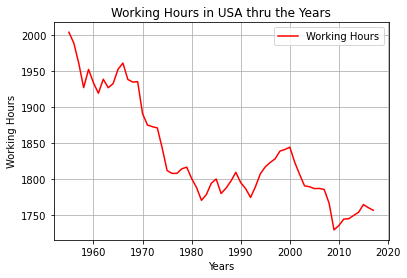

In [23]:
#Plotting working hours in USA and saving plot fig to png format
fig = plt.figure()
plt.title("Working Hours in USA thru the Years")
plt.ylabel("Working Hours")
plt.xlabel("Years")
plt.plot(years,work_hours, color='red', label="Working Hours")
plt.legend(loc="upper right")
plt.grid()
fig.savefig("data/working_hours_USA.png")

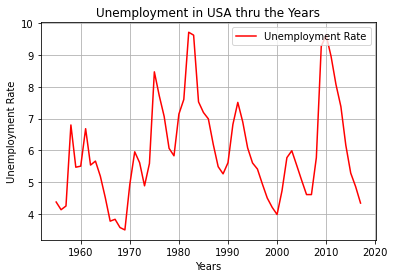

In [24]:
#Plottingunemployment rate in USA and saving plot fig to png format
fig = plt.figure()
plt.title("Unemployment in USA thru the Years")
plt.ylabel("Unemployment Rate")
plt.xlabel("Years")
plt.plot(years,unemployment, color='red', label="Unemployment Rate")
plt.legend(loc="upper right")
plt.grid()
fig.savefig("data/unemployment_rate_USA.png")

The r-squared is: 0.3284193240710849


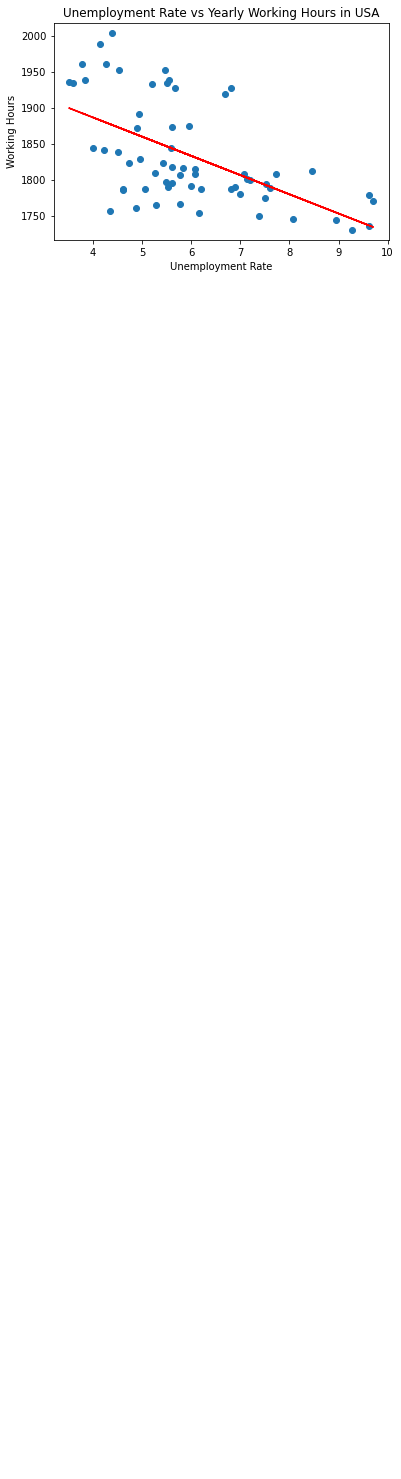

In [22]:
# Add the linear regression equation and line to plot and saving plot fig to png format
fig = plt.figure()
x_values = unemployment
y_values = work_hours
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Unemployment Rate vs Yearly Working Hours in USA")
plt.ylabel("Working Hours")
plt.xlabel("Unemployment Rate")
print(f"The r-squared is: {rvalue**2}")
fig.savefig("data/life_exp_vs_work_hrs_linear_regression.png")
plt.show()